<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Portafolio_Fiduciaria_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# **Portafolio Diario**

In [ ]:
from google.colab import files

files.upload()

In [10]:
FIB = pd.read_excel("/content/FIB Formato portafolio diario para envío 6..xlsx")

In [100]:
Ultimo_Portafolio = FIB.loc[FIB['Fecha'] > "2023-02-11"] 

In [133]:
Composicion = pd.pivot_table(Ultimo_Portafolio, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'FIC', 'No Tiene': 'AHORROS'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [134]:
Composicion = Composicion.data

In [135]:
Composicion.fillna(0, inplace=True)

In [136]:
corr_matrix=Composicion.corr()

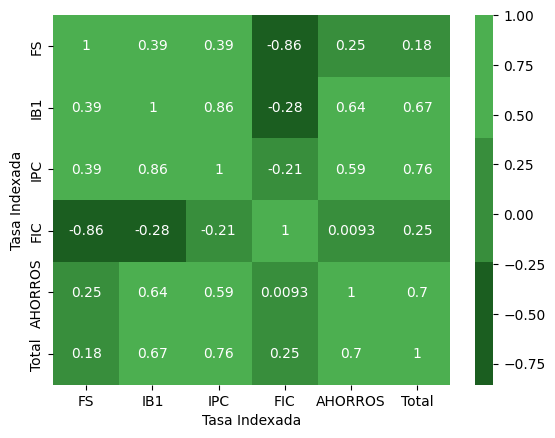

In [137]:
colors = ['#1B5E20', '#388E3C', '#4CAF50']
cmap = ListedColormap(colors)
sns.heatmap(corr_matrix,cmap=cmap, annot=True)
plt.show()

In [145]:
Composicion=Composicion.drop(columns=['FIC'])

In [ ]:
returns = Composicion.pct_change()
returns.fillna(0, inplace=True)
returns.plot()

In [147]:
cov_matrix = returns.cov()
expected_returns = returns.mean()

In [148]:
expected_returns

Tasa Indexada
FS         0.009507
IB1        0.015255
IPC        0.012570
AHORROS    0.009668
dtype: float64

In [149]:
weights = np.linalg.inv(cov_matrix).dot(expected_returns)

# normalizar los pesos del portafolio
weights /= np.sum(weights)

# calcular el rendimiento esperado del portafolio
portfolio_return = np.dot(expected_returns, weights)

# calcular la varianza del portafolio
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# calcular la desviación estándar del portafolio
portfolio_std_dev = np.sqrt(portfolio_variance)

# imprimir los resultados
print('Pesos del portafolio:', weights)
print('Rendimiento esperado del portafolio:', portfolio_return)
print('Varianza del portafolio:', portfolio_variance)
print('Desviación estándar del portafolio:', portfolio_std_dev)

Pesos del portafolio: [-0.26211439  0.2944321   0.63433734  0.33334495]
Rendimiento esperado del portafolio: 0.01319583164770893
Varianza del portafolio: 0.0016915821496194272
Desviación estándar del portafolio: 0.04112884814360143


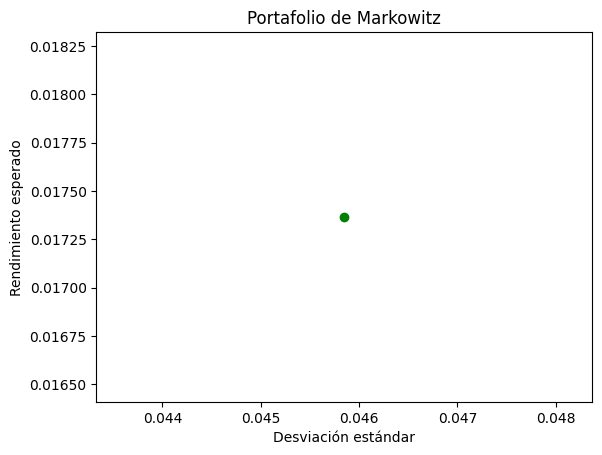

In [143]:
plt.scatter(portfolio_std_dev, portfolio_return, c='g', marker='o')
plt.xlabel('Desviación estándar')
plt.ylabel('Rendimiento esperado')
plt.title('Portafolio de Markowitz')
plt.show()

In [ ]:
df = Composicion.data
# Calcular la columna de porcentajes
porcentajes = df.div(df.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
df = pd.concat([df, porcentajes], axis=0)
Composicion = df.style.format('{:,.2f}'.format)
Composicion

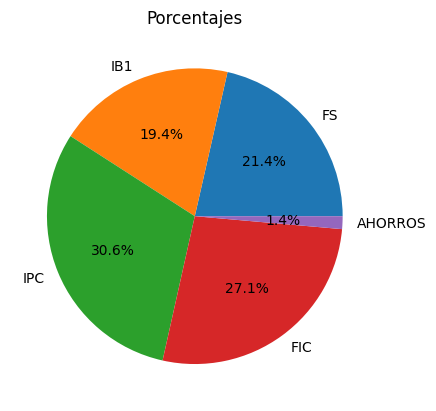

In [21]:
fig, ax = plt.subplots()
ax.pie(porcentajes.iloc[-1], labels=porcentajes.columns, autopct='%1.1f%%')
ax.set_title('Porcentajes')
plt.show()

# **Portafolio Historico**

In [ ]:
Composicion

In [23]:
porcentajes.fillna(0, inplace=True)

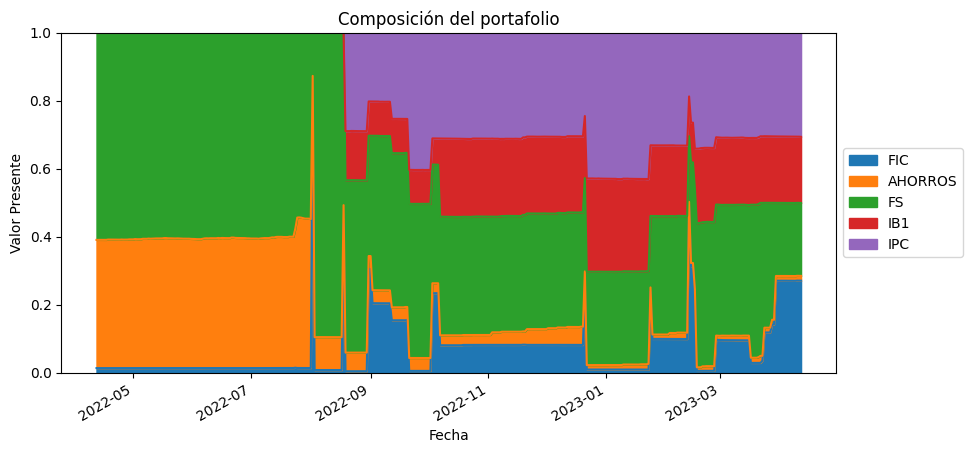

In [24]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['FIC','AHORROS',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

In [32]:
Ultimo_Portafolio = FIB.loc[FIB['Fecha'] > "2023-04-11"] 

In [33]:
Utilidadindicador = pd.pivot_table(Ultimo_Portafolio, values='Utilidad día', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'FIC', 'No Tiene': 'AHORROS'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [34]:
Utilidadindicador 

Tasa Indexada,FS,IB1,IPC,FIC,AHORROS,Total
Fecha,,,,,,
2023-04-12 00:00:00,"7,745,000.00","-3,450,000.00","35,820,000.00","-1,159,295.15","48,854.25","39,004,559.10"


In [35]:
df = Utilidadindicador .data
# Calcular la columna de porcentajes
porcentajes = df.div(df.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
df = pd.concat([df, porcentajes], axis=0)
Utilidadindicador  = df.style.format('{:,.2f}'.format)

Utilidadindicador 

,FS,IB1,IPC,FIC,AHORROS,Total
Fecha,,,,,,
2023-04-12 00:00:00,"7,745,000.00","-3,450,000.00","35,820,000.00","-1,159,295.15","48,854.25","39,004,559.10"
2023-04-12 00:00:00,0.20,-0.09,0.92,-0.03,0.00,nan
